In [211]:
import numpy as np
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

df = pd.read_csv('D:\Linh\WVS7.csv')

C:\Users\Administrator\AppData\Local\Temp\ipykernel_4316\3994919747.py:11: DtypeWarning: Columns (345,347,349,574,575,576) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('D:\Linh\WVS7.csv')


In [212]:
# Tạo bảng dữ liệu data
dt = {
    "Gender": df["Q260"],
    "Happiness": df["Q46"],
    "Age": df["Q262"],
    "Income": df["Q288"],
    "Marital": df["Q273"],
    "Childs": df["Q274"]
}
dt = pd.DataFrame(dt)
#print(dt)

In [223]:
# Loại bỏ các giá trị âm trong cột Income
dt = dt.loc[(dt['Happiness'] > 0) & (dt['Age'] > 0) & (dt['Income'] > 0) 
                & (dt['Marital'] > 0) & (dt['Childs'] > 0)].reset_index(drop=True)

# Tạo bảng dữ liệu male
male = dt.loc[dt['Gender'] == 1].reset_index(drop=True)

# Tạo bảng dữ liệu female
female = dt.loc[dt['Gender'] == 2].reset_index(drop=True)

#print(male)
#print(female)

In [214]:

X = dt[['Income']]
y = dt['Happiness']

# Separating the data into independent and dependent variables
# Converting each dataframe into a numpy array
# since each dataframe contains only one column
#df_binary.dropna(inplace = True)

# Dropping any rows with Nan values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Splitting the data into training and testing data
model = LinearRegression()

model.fit(X_train, y_train)

print(model.score(X_test, y_test))

y_pred = model.predict(X_test)
# Chuyển đổi y_test và y_pred thành pandas Series
y_test_series = pd.Series(y_test, name='Actual').reset_index(drop = True)
y_pred_series = pd.Series(y_pred, name='Predicted')

# Tạo dataframe mới chứa hai cột Actual và Predicted
df1 = pd.concat([y_test_series, y_pred_series], axis=1)
#print(df1)


0.004497006065069753


In [215]:
from prettytable import PrettyTable
#from sklearn.linear_model import LogisticRegression

table = PrettyTable()
model = LogisticRegression(max_iter=1000)


r2_scores = []
r2_scores.append(model.fit(dt[["Gender"]], dt["Happiness"]).score(dt[["Gender"]], dt["Happiness"]))
r2_scores.append(model.fit(dt[["Age"]], dt["Happiness"]).score(dt[["Age"]], dt["Happiness"]))
r2_scores.append(model.fit(dt[["Marital"]], dt["Happiness"]).score(dt[["Marital"]], dt["Happiness"]))
r2_scores.append(model.fit(dt[["Childs"]], dt["Happiness"]).score(dt[["Childs"]], dt["Happiness"]))
r2_scores.append(model.fit(dt[["Income"]], dt["Happiness"]).score(dt[["Income"]], dt["Happiness"]))

r2_scores.append(model.fit(dt[["Income","Marital"]], dt["Happiness"]).score(dt[["Income","Marital"]], dt["Happiness"]))


table.field_names = ["Thuộc tính", "R-square"]
table.add_row(["Giới tính", r2_scores[0]])
table.add_row(["Tuổi", r2_scores[1]])
table.add_row(["Tình trạng hôn nhân", r2_scores[2]])
table.add_row(["Số con cái", r2_scores[3]])
table.add_row(["Thu nhập", r2_scores[4]])
table.add_row(["Thu nhập, tình trạng hôn nhân", r2_scores[5]])

#table.add_row([" ", " "])
#table.add_row(["Mean ", dt["Happiness"].mean()])
#table.add_row(["Mean male", male["Happiness"].mean()])
#table.add_row(["Mean female", female["Happiness"].mean()])

print(table)



+-------------------------------+--------------------+
|           Thuộc tính          |      R-square      |
+-------------------------------+--------------------+
|           Giới tính           | 0.5438808629796983 |
|              Tuổi             | 0.5438808629796983 |
|      Tình trạng hôn nhân      | 0.5438808629796983 |
|           Số con cái          | 0.5439551114788179 |
|            Thu nhập           | 0.5438808629796983 |
| Thu nhập, tình trạng hôn nhân | 0.5438808629796983 |
+-------------------------------+--------------------+


       Gender  Happiness  Age  Income  Marital  Childs
0           2          1   60       5        1       2
1           2          2   62       4        2       1
2           2          1   51       5        1       3
3           2          2   33       2        1       1
4           2          1   38       6        2       1
...       ...        ...  ...     ...      ...     ...
61428       2          1   59       2        6       6
61429       1          1   58       4        2       2
61430       1          2   37       2        2       4
61431       2          3   20       1        6       1
61432       1          2   41       2        2       5

[61433 rows x 6 columns]
       Gender  Happiness  Age  Income  Marital  Childs
0           2          1   60       5        1       2
1           2          2   62       4        2       1
2           2          1   51       5        1       3
3           2          2   33       2        1       1
4           2          1   38       6  

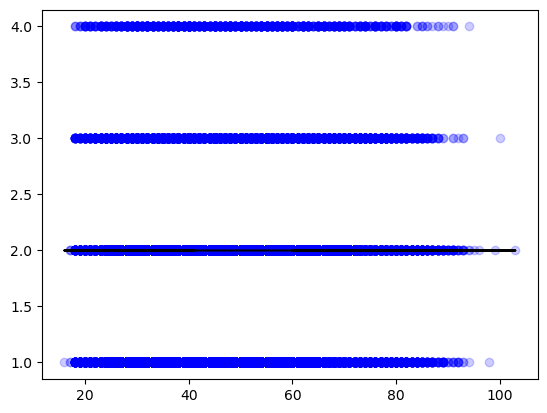

In [225]:
model1 = LogisticRegression()
X1 = dt[['Age']]
y1 = dt['Happiness']
model1.fit(X1,y1)
y_pred = model1.predict(X1)
plt.scatter(X1, y1, color ='b', alpha = 0.2)
plt.plot(X1, y_pred, color ='k')

print(dt)
print(dt1)
plt.show()


Không có giá trị âm trong cột Happiness.
